In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "Data\winequality-red.csv"  # Update if needed
df = pd.read_csv(file_path)

<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Saian\AppData\Local\Temp\ipykernel_6320\1186338799.py:2: SyntaxWarning: invalid escape sequence '\w'
  file_path = "Data\winequality-red.csv"  # Update if needed


In [3]:
# Define the two groups: higher quality and lower quality
# Higher quality is >=6 and lower quality is <=5
group_6 = df[df['quality'] >= 6]['volatile acidity'].dropna()
group_5 = df[df['quality'] <= 5]['volatile acidity'].dropna()

In [4]:
# Perform an independent samples t-test (Welch's t-test, assumes unequal variances)
t_stat, p_value = stats.ttest_ind(group_6, group_5, equal_var=False)

# Compute 95% Confidence Interval for the difference in means
mean_diff = np.mean(group_6) - np.mean(group_5)
se_diff = np.sqrt(np.var(group_6, ddof=1)/len(group_6) + np.var(group_5, ddof=1)/len(group_5))
ci_lower = mean_diff - 1.96 * se_diff  # 95% CI lower bound
ci_upper = mean_diff + 1.96 * se_diff  # 95% CI upper bound

# Display results
print("\nTwo-Sample t-Test (Welch's) Results:")
print(f"Null Hypothesis (H₀): Mean alcohol content for quality 6 and 5 is equal")
print(f"Alternative Hypothesis (H₁): Mean alcohol content is different between quality 6 and 5")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Mean Difference: {mean_diff:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between wines of quality 6 and 5.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). There is no significant difference in alcohol content between wines of quality 6 and 5.")


Two-Sample t-Test (Welch's) Results:
Null Hypothesis (H₀): Mean alcohol content for quality 6 and 5 is equal
Alternative Hypothesis (H₁): Mean alcohol content is different between quality 6 and 5
t-statistic: -13.4775
p-value: 0.0000
Mean Difference: -0.1154
95% Confidence Interval: (-0.1321, -0.0986)

Conclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between wines of quality 6 and 5.


In [12]:
# Define the two groups: higher quality and lower quality
# Higher quality is >=6 and lower quality is <=5
high_quality = df[df['quality'] >= 6]['free sulfur dioxide'].dropna()
low_quality = df[df['quality'] <= 5]['free sulfur dioxide'].dropna()


In [13]:

# Count how many of each
nHighQuality = high_quality.count()
print(f"Entries in High Quality Group: {nHighQuality}")
nLowQuality = low_quality.count()
print(f"Entries in Low Quality Group: {nLowQuality}")

Entries in High Quality Group: 855
Entries in Low Quality Group: 744


C:\Users\Saian\AppData\Local\Temp\ipykernel_6320\724829446.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([high_quality, low_quality], labels=["High Quality", "Low Quality"])


Text(0, 0.5, 'Alcohol Content (%)')

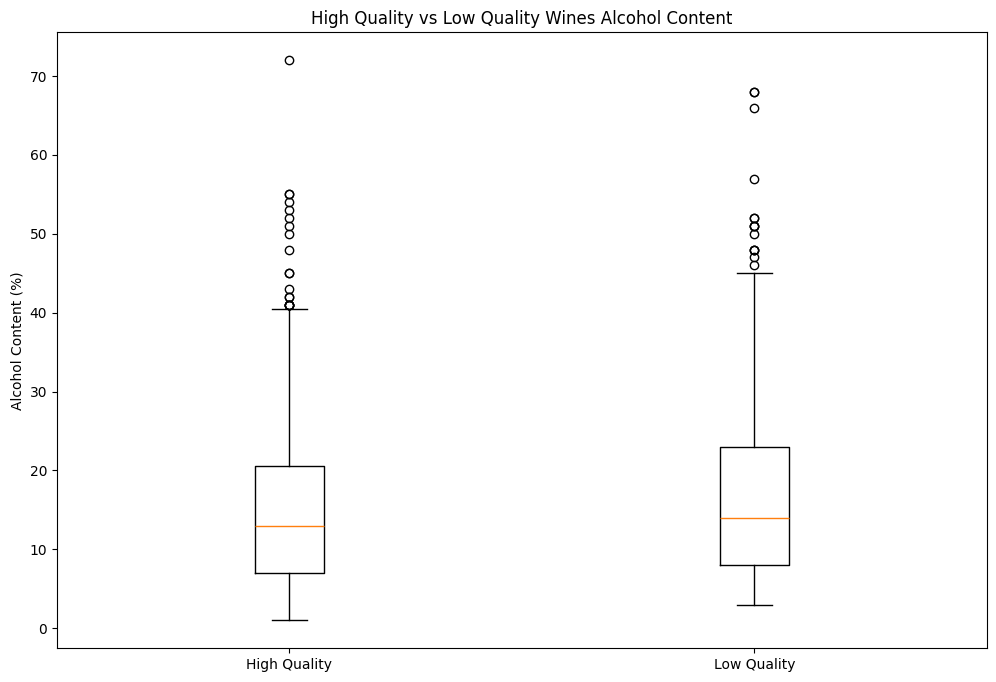

In [14]:
# Compare groups - box plots

labels = np.array(["High Quality"]*nHighQuality + ["Low Quality"]*nLowQuality)
combinedGroups = np.concatenate([high_quality, low_quality])

# Draw the box plot
plt.figure(figsize=(12,8))
plt.boxplot([high_quality, low_quality], labels=["High Quality", "Low Quality"])
plt.title("High Quality vs Low Quality Wines Alcohol Content")
plt.ylabel("Alcohol Content (%)")


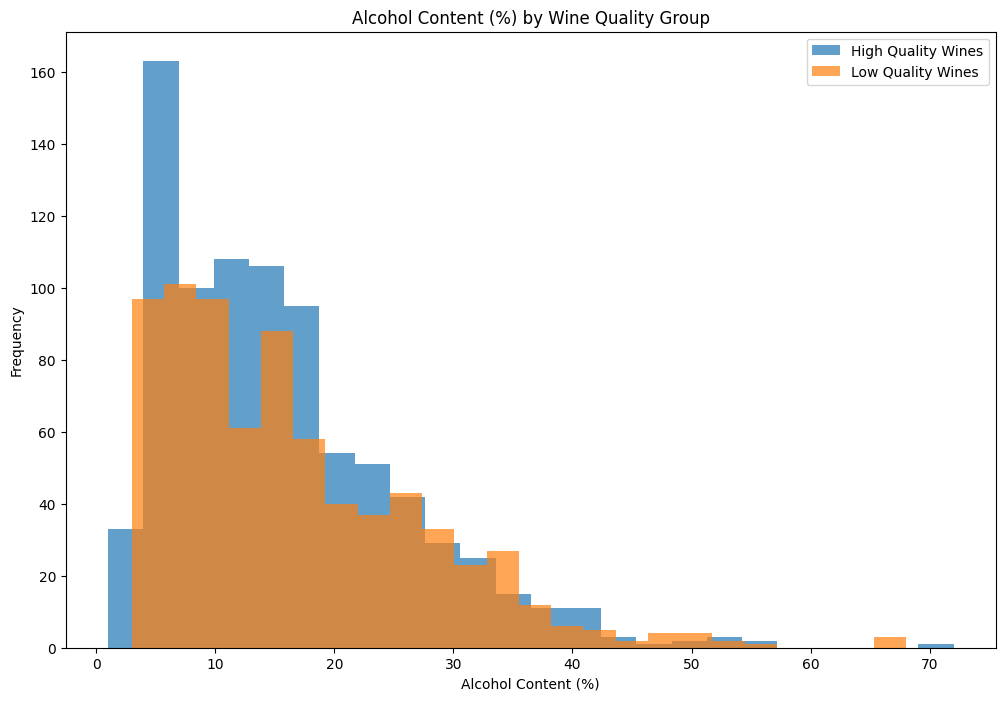

In [15]:
# Compare groups - Histogram
plt.figure(figsize=(12,8))
plt.hist(high_quality, bins=24, alpha=0.7, label="High Quality Wines")
plt.hist(low_quality, bins=24, alpha=0.7, label="Low Quality Wines")
plt.title("Alcohol Content (%) by Wine Quality Group")
plt.xlabel("Alcohol Content (%)")
plt.ylabel("Frequency")
plt.legend()

In [16]:
# Perform a Two-Sample t-test (independent)
t_stat, p_value = stats.ttest_ind(high_quality, low_quality, equal_var=True)

# Display the results
print("Two-Sample t-test (Alcohol Content between high and low quality wines)")
print("t_stat = ", t_stat)
print("p_value = ", p_value)

# Check against the significance level
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between high and low quality wines.")
else:
    print("\nConclusion: Fail to reject the null hypothesis (H₀). There is no significant difference in alcohol content between high and low quality wines.")

Two-Sample t-test (Alcohol Content between high and low quality wines)
t_stat =  -2.472672557220334
p_value =  0.013514166933861208

Conclusion: Reject the null hypothesis (H₀). There is a significant difference in alcohol content between high and low quality wines.


In [17]:
# Manual Approach
std_high_quality = np.std(high_quality)
mean_high_quality = np.mean(high_quality)

std_low_quality = np.std(low_quality)
mean_low_quality = np.mean(low_quality)

# Calculate SE of difference - population based
SE_diff = np.sqrt(np.square(std_high_quality) / nHighQuality + np.square(std_low_quality) / nLowQuality)
print(f"Population-based Standard Error of the Difference = {SE_diff:3f}")

# Calculate Z
Z = ((mean_high_quality - mean_low_quality) - 0) / SE_diff
print(f"Z-score = {Z:3f}")

#  Calculate p-value - p >= |Z|
p_value_manual = stats.norm.sf(abs(Z)) * 2 # Two-sided
print(f"p-value = {p_value_manual}")


Population-based Standard Error of the Difference = 0.526229
Z-score = -2.460317
p-value = 0.013881421244196395


In [18]:
# Power Analysis - Analytical Approach

from statsmodels.stats.power import TTestIndPower

# Instantiate TTestIndPower class
analysis = TTestIndPower()

# Anticipated difference
difference = 1.0

# Assumed standard deviation
std = 1.0

# Cohen's d: Effect Size = (difference / std)
effect_size = difference / std

# Set significance level and power
alpha = 0.05
power = 0.90

# Solve for sample size per group
sample_size = analysis.solve_power(effect_size=effect_size,
                                   alpha=alpha,
                                   power=power,
                                   alternative='two-sided')

# Display the result
print("Required sample size per group = ", sample_size)

#  Suppose we fix n per group, find the power
nFix = 20
my_power = analysis.solve_power(effect_size=effect_size,
                          alpha=alpha,
                          nobs1=nFix,
                          alternative='two-sided')

# Display the result
print(f"Power with n = {nFix} per group = {my_power:3f}")

Required sample size per group =  22.021089673603985
Power with n = 20 per group = 0.868953


In [19]:
# Power Analysis - Simulated Approach

# Build a function for simulating power
def simulate_power(n=20, true_diff=1.0, sigma=1.0, alpha=0.05, reps=5000):

    # Estimate power for a two-sample t-test (equal variances) via simulation

    np.random.seed(42)
    rejects = 0

    for _ in range(reps):

        group1 = np.random.normal(loc=0, scale=sigma, size=n)
        group2 = np.random.normal(loc=true_diff, scale=sigma, size=n)

        # Apply a two-sample t-test
        t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)

        # Check if p_val < alpha, reject H0 if so
        if p_val < alpha:

            # Increment rejects
            rejects += 1

    # Fraction of rejections approximates power
    power_est = rejects / reps
    return power_est


#  Call the function
power_sim = simulate_power(n=20, true_diff=1.0, sigma=1.0, alpha=0.05, reps=5000)

#  Display the result
print(f"Simulated power estimate gives power = {power_sim:3f}")

Simulated power estimate gives power = 0.873200
